File uploaded: image(5).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


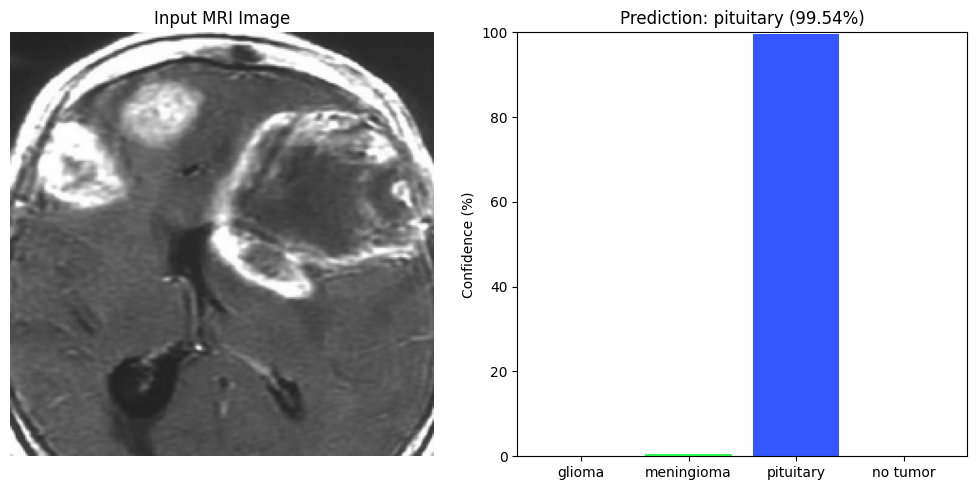


🧠 Tumor Type: pituitary
✅ Confidence: 99.54%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install -q tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from google.colab import files
from IPython.display import display, clear_output
import PIL.Image
import io
model_path = '/content/drive/MyDrive/brain_tumor_model.h5'
model = tf.keras.models.load_model(model_path)
classes = ['glioma', 'meningioma', 'pituitary', 'no tumor']
def normalize_mri(img_array):
    return (img_array / 127.5) - 1.0
def predict_tumor(image_pil):
    img = image_pil.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = normalize_mri(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    result = classes[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    return img, result, confidence, prediction
def display_prediction(image_pil):
    img, result, confidence, prediction = predict_tumor(image_pil)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(np.array(img) / 255.0)
    plt.axis('off')
    plt.title("Input MRI Image")
    plt.subplot(1, 2, 2)
    colors = ['#FF5733', '#33FF57', '#3357FF', '#F3FF33']
    plt.bar(classes, prediction[0] * 100, color=colors)
    plt.ylabel('Confidence (%)')
    plt.ylim(0, 100)
    plt.title(f"Prediction: {result} ({confidence:.2f}%)")
    plt.tight_layout()
    plt.show()
    print(f"\n🧠 Tumor Type: {result}\n✅ Confidence: {confidence:.2f}%")
uploaded = files.upload()
for filename in uploaded.keys():
    image_pil = PIL.Image.open(io.BytesIO(uploaded[filename])).convert('RGB')
    clear_output()
    print(f"File uploaded: {filename}")
    display_prediction(image_pil)